In [19]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
plt.close('all')

## EDA

In [3]:
df = pd.read_csv('coffee_analysis.csv')
df.head()

,name,roaster,roast,loc_country,origin_1,origin_2,100g_USD,rating,review_date,desc_1,desc_2,desc_3
0,“Sweety” Espresso Blend,A.R.C.,Medium-Light,Hong Kong,Panama,Ethiopia,14.32,95,November 2017,"Evaluated as espresso. Sweet-toned, deeply ric...",An espresso blend comprised of coffees from Pa...,A radiant espresso blend that shines equally i...
1,Flora Blend Espresso,A.R.C.,Medium-Light,Hong Kong,Africa,Asia Pacific,9.05,94,November 2017,"Evaluated as espresso. Sweetly tart, floral-to...",An espresso blend comprised of coffees from Af...,"A floral-driven straight shot, amplified with ..."
2,Ethiopia Shakiso Mormora,Revel Coffee,Medium-Light,United States,Guji Zone,Southern Ethiopia,4.70,92,November 2017,"Crisply sweet, cocoa-toned. Lemon blossom, roa...",This coffee tied for the third-highest rating ...,"A gently spice-toned, floral- driven wet-proce..."
3,Ethiopia Suke Quto,Roast House,Medium-Light,United States,Guji Zone,Oromia Region,4.19,92,November 2017,"Delicate, sweetly spice-toned. Pink peppercorn...",This coffee tied for the third-highest rating ...,Lavender-like flowers and hints of zesty pink ...
4,Ethiopia Gedeb Halo Beriti,Big Creek Coffee Roasters,Medium,United States,Gedeb District,Gedeo Zone,4.85,94,November 2017,"Deeply sweet, subtly pungent. Honey, pear, tan...",Southern Ethiopia coffees like this one are pr...,A deeply and generously lush cup saved from se...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         2095 non-null   object 
 1   roaster      2095 non-null   object 
 2   roast        2080 non-null   object 
 3   loc_country  2095 non-null   object 
 4   origin_1     2095 non-null   object 
 5   origin_2     2095 non-null   object 
 6   100g_USD     2095 non-null   float64
 7   rating       2095 non-null   int64  
 8   review_date  2095 non-null   object 
 9   desc_1       2095 non-null   object 
 10  desc_2       2095 non-null   object 
 11  desc_3       2093 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 196.5+ KB


In [5]:
# Find missing values
df.isnull().sum()

name            0
roaster         0
roast          15
loc_country     0
origin_1        0
origin_2        0
100g_USD        0
rating          0
review_date     0
desc_1          0
desc_2          0
desc_3          2
dtype: int64

In [6]:
# Drop rows with missing values since its only 17 values
df.dropna(inplace=True)
df.describe()

,100g_USD,rating
count,2078.000000,2078.000000
mean,9.088239,93.112608
std,10.341998,1.563863
min,0.170000,84.000000
25%,4.930000,92.000000
50%,5.860000,93.000000
75%,8.770000,94.000000
max,132.280000,98.000000


In [7]:
# Find categorical column cardinality
df.select_dtypes(include=['object']).nunique()

name           1896
roaster         421
roast             5
loc_country      19
origin_1        611
origin_2        357
review_date      61
desc_1         2075
desc_2         2012
desc_3         2075
dtype: int64

<Axes: >

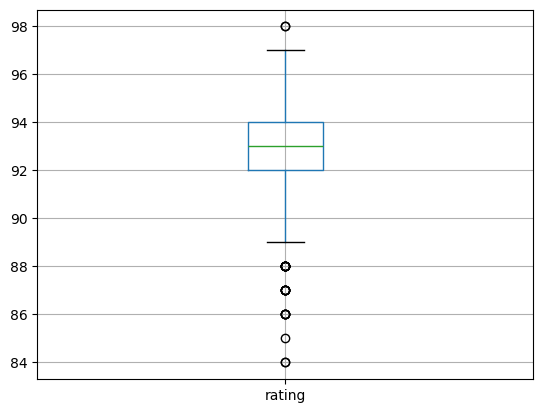

In [8]:
# plot the distribution of the rating column
df.boxplot(column="rating")

In [9]:
# split data into numerical and categorical
categorical_columns = df.select_dtypes(include=["object"]).columns
numerical_columns = df.drop(columns=categorical_columns).columns

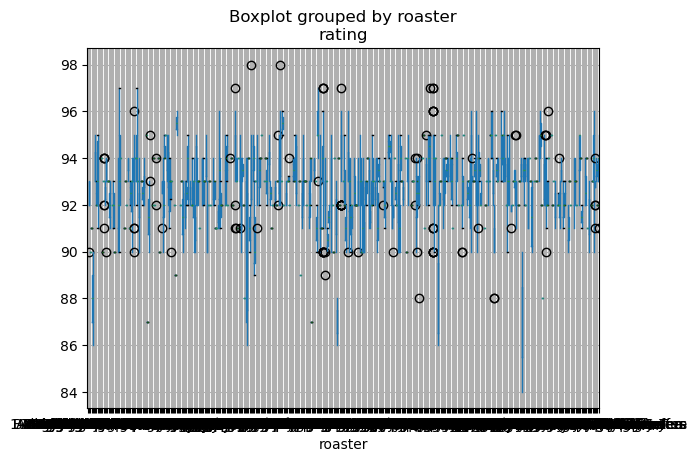

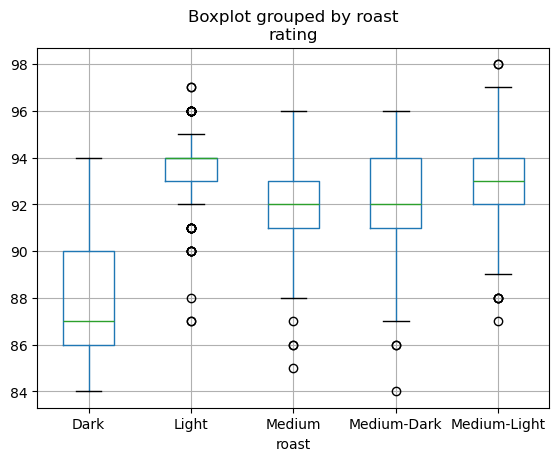

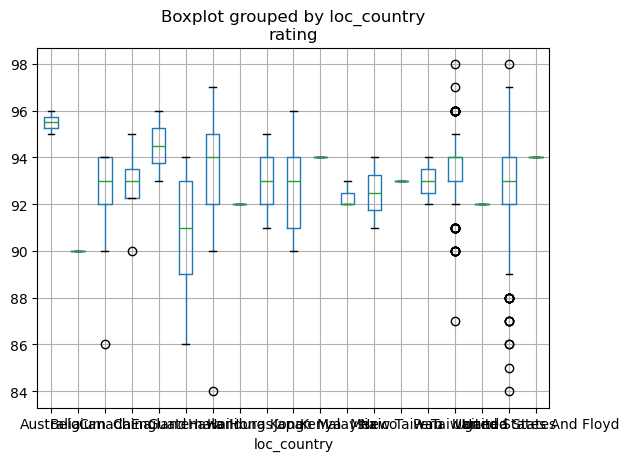

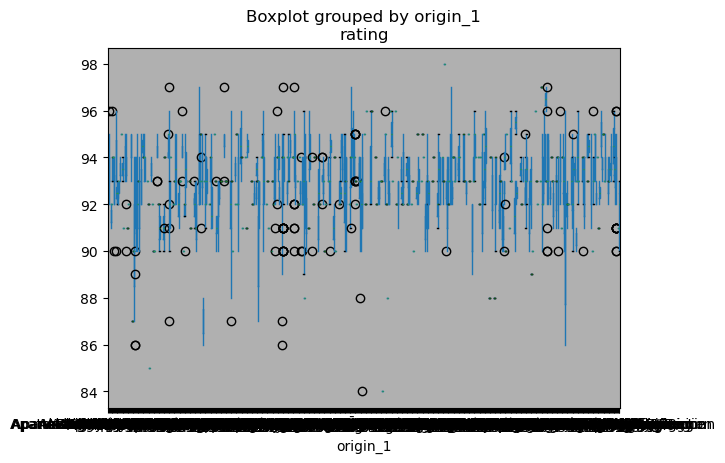

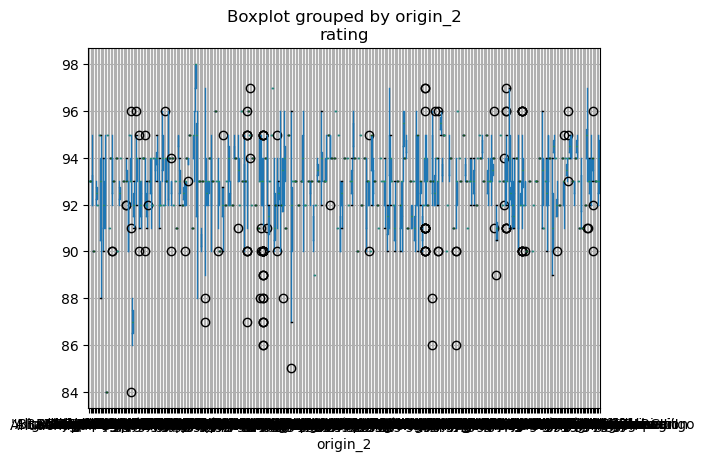

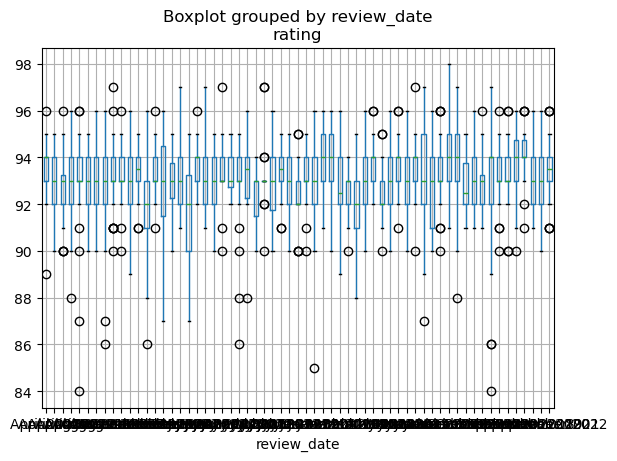

In [10]:
# create a boxplot for each categorical column in relation to rating
for col in categorical_columns:
    # Do not include columns with very high cardinality
    if col not in ["name", "desc_1", "desc_2", "desc_3"]:
        df.boxplot(column="rating", by=col)
        plt.show()

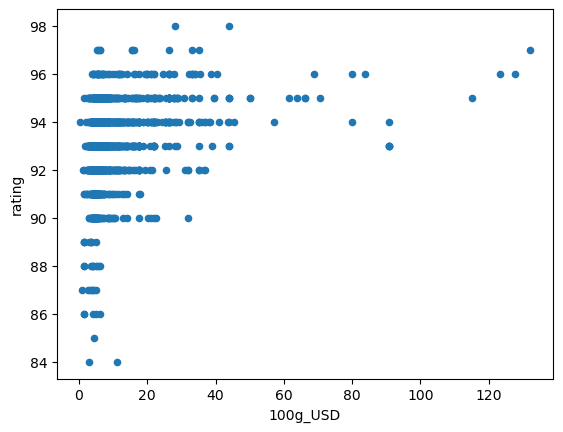

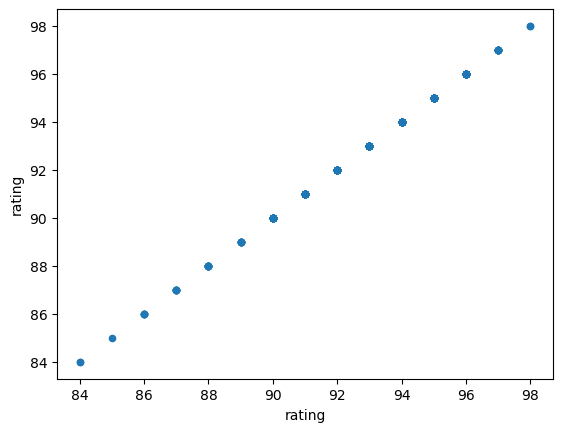

In [11]:
# create a scatter plot for every numerical column in relation to price
for col in numerical_columns:
    df.plot.scatter(x=col, y="rating")
    plt.show()

## Simple Bias Regressor (Baseline)

In [12]:
# simble bias baseline mse
y = df["rating"]
y_pred = [y.mean()] * len(y)
mse = mean_squared_error(y, y_pred)
mse

2.4444897320200347

## Single Feature Linear Regression

In [13]:
# features that look like they could be useful for prediction
pot_cat_features = ["loc_country", "roast"]
pot_num_features = ["100g_USD"]

# train linear regression model on a single categorical feature
for f in pot_cat_features:
    df2 = df.copy()
    df2 = df2[["rating", f]]
    df2.dropna(subset=[f], inplace=True)
    X = df2[[f]]
    y = df2["rating"]
    X = pd.get_dummies(X, columns=[f])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    print(f"Score for {f}: {lr.score(X_test, y_test)}")

# train linear regression model on a single numerical feature
for f in pot_num_features:
    df2 = df.copy()
    df2 = df2[["rating", f]]
    df2.dropna(subset=[f], inplace=True)
    X = df2[[f]]
    y = df2["rating"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    print(f"Score for {f}: {lr.score(X_test, y_test)}")


Score for loc_country: 0.013796551329488649
Score for roast: 0.02020736324515049
Score for 100g_USD: 0.05573202036912084


All three of these features very slightly beat the simple bias regressor showing a small level of linear correlation with the target

In [33]:
# train knn regressor on a single categorical feature
for f in pot_cat_features:
    df2 = df.copy()
    df2 = df2[["rating", f]]
    df2.dropna(subset=[f], inplace=True)
    X = df2[[f]]
    y = df2["rating"]
    X = pd.get_dummies(X, columns=[f])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    params = {'n_neighbors':list(range(1, 50))}
    lr = KNeighborsRegressor()
    lr = GridSearchCV(lr, params, cv=5)
    lr.fit(X_train, y_train)
    print(lr.best_params_)
    print(f"Score for {f}: {lr.score(X_test, y_test)}")

# train knn regressor on a single numerical feature
for f in pot_num_features:
    df2 = df.copy()
    df2 = df2[["rating", f]]
    df2.dropna(subset=[f], inplace=True)
    X = df2[[f]]
    y = df2["rating"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    params = {'n_neighbors':list(range(1, 50))}
    lr = KNeighborsRegressor()
    lr = GridSearchCV(lr, params, cv=5)
    lr.fit(X_train, y_train)
    print(lr.best_params_)
    print(f"Score for {f}: {lr.score(X_test, y_test)}")

{'n_neighbors': 28}
Score for loc_country: 0.02291177399038391
{'n_neighbors': 7}
Score for roast: -0.08577651685236676
{'n_neighbors': 20}
Score for 100g_USD: 0.10116607492274898


Using KNN regressors performs better for the '100g_USD' and 'loc_country' features, as they demonstrate a better spatial correlation with the target. However, the 'roast' feature is now worse than the baseline regressor at predicting the target. 